In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

C:\Users\theam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Read the data
df = pd.read_csv("C:\\ExcelR\\Data Science Assignments\\5-Multi Linear Regression\\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#check for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Correlation Matrix

In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

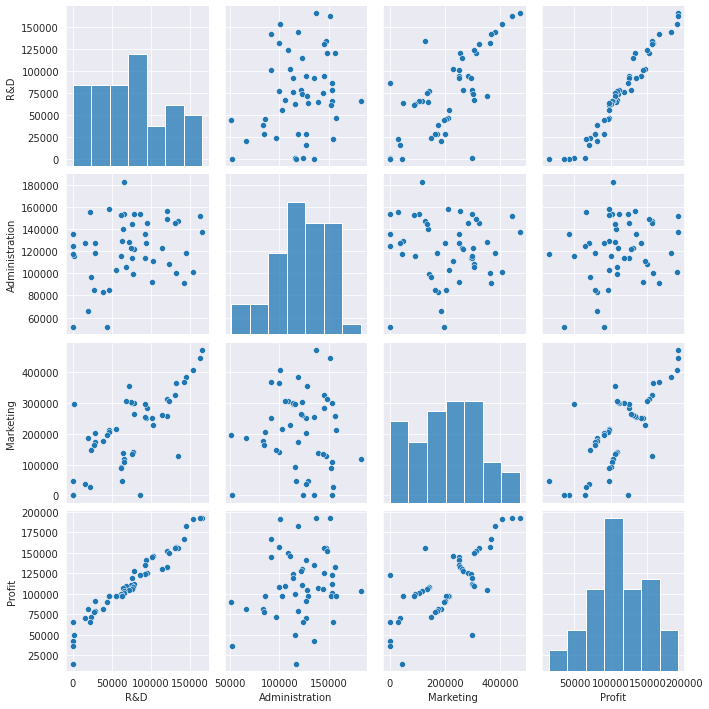

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Preparing a model

In [9]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration+State',data=df).fit()

In [10]:
#Coefficients
model.params

Intercept            69452.455606
State[T.Florida]     14577.129410
State[T.New York]     9623.872788
Administration           0.285331
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept            2.606501
State[T.Florida]     1.039292
State[T.New York]    0.696812
Administration       1.389676
dtype: float64 
 Intercept            0.012287
State[T.Florida]     0.304101
State[T.New York]    0.489427
Administration       0.171317
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.06320431214697597, 0.0021089412000395713)

# Simple Linear Regression Models

In [13]:
ml_v=smf.ols('Profit~Administration',data = df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [14]:
ml_w=smf.ols('Profit~State',data = df).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64 
 Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64


# Calculating VIF

In [15]:
rsq_Profit = smf.ols('Profit~State+Administration',data=df).fit().rsquared  
vif_Profit = 1/(1-rsq_Profit) 


rsq_Administration = smf.ols('Administration~Profit+State',data=df).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 


# Storing vif values in a data frame
d1 = {'Variables':['Profit','Administration'],'VIF':[vif_Profit,vif_Administration]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Profit,1.067469
1,Administration,1.042244


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

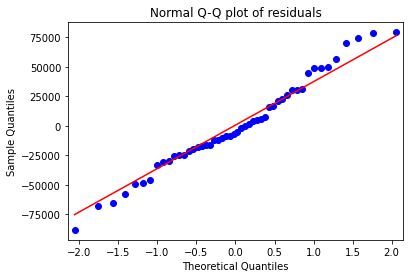

In [16]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [17]:
list(np.where(model.resid>10))

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 20, 24, 37], dtype=int64)]

## Residual Plot for Homoscedasticity

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

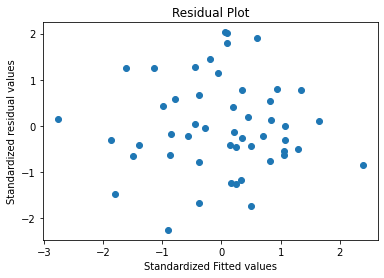

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

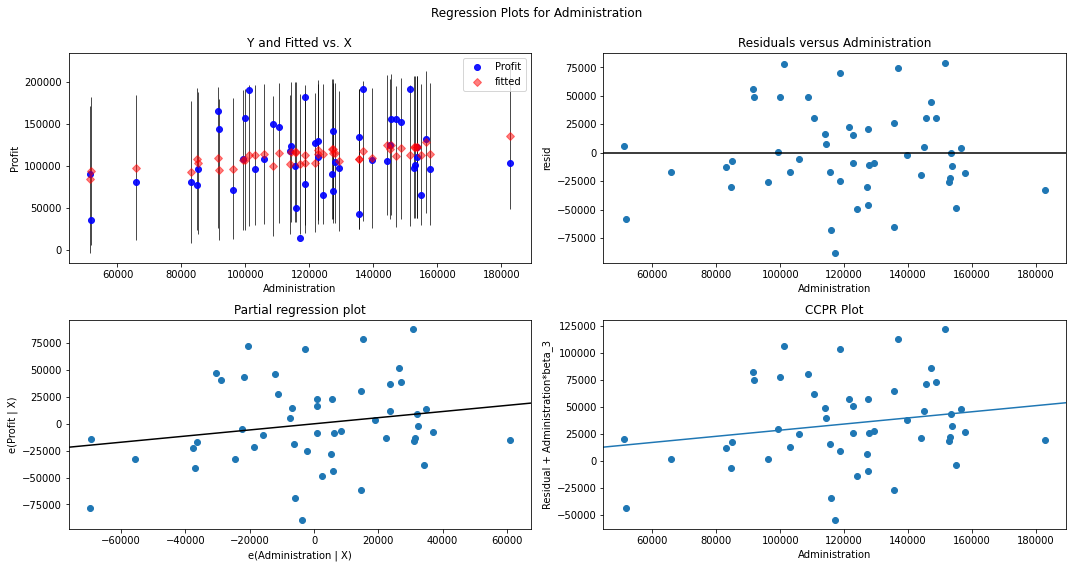

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [21]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

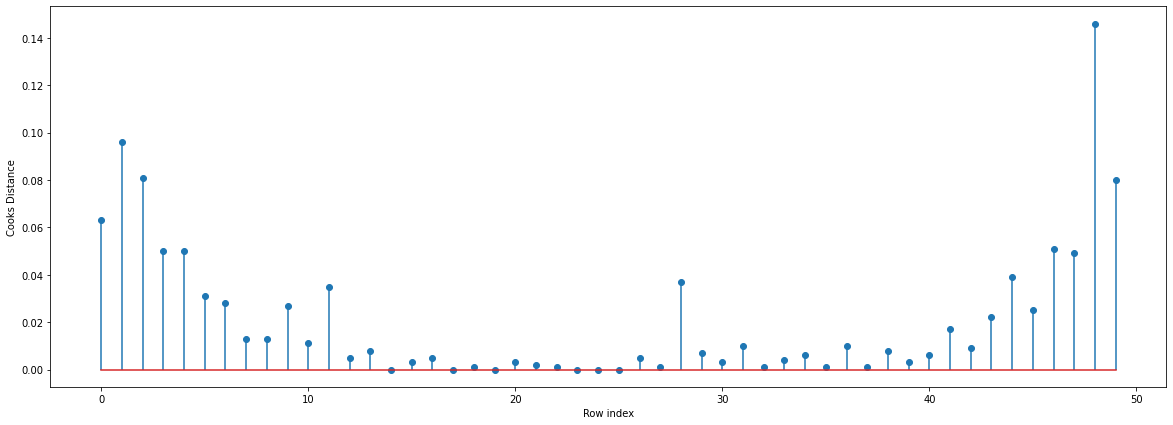

In [22]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [23]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(48, 0.1459114460102403)

## High Influence points

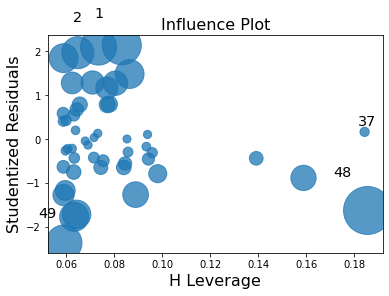

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [25]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [26]:
leverage_cutoff

0.36

#### From the above plot, it is evident that data point 47,48 and 49 are the influencers

In [27]:
df[df.index.isin([47,48,49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [28]:
#See the differences in HP and other variable values
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Improving the model

In [30]:
#Load the data
df_new = pd.read_csv("C:\\ExcelR\\Data Science Assignments\\5-Multi Linear Regression\\50_Startups.csv",index_col=[0])

In [32]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[47,48,49]],axis=0).reset_index()

In [33]:
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [34]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~State',data = df1).fit()

In [35]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.003980637739215753, 1123.2500360337767)

In [36]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('Profit~Administration',data = df1).fit()

In [37]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.018784133896428412, 1120.5462479258895)

In [38]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_X= smf.ols('Administration~State',data = df1).fit()

In [ ]:
(final_ml_X.rsquared,final_ml_X.aic)

(0.008577406866640658, 1096.8110255148317)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [39]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

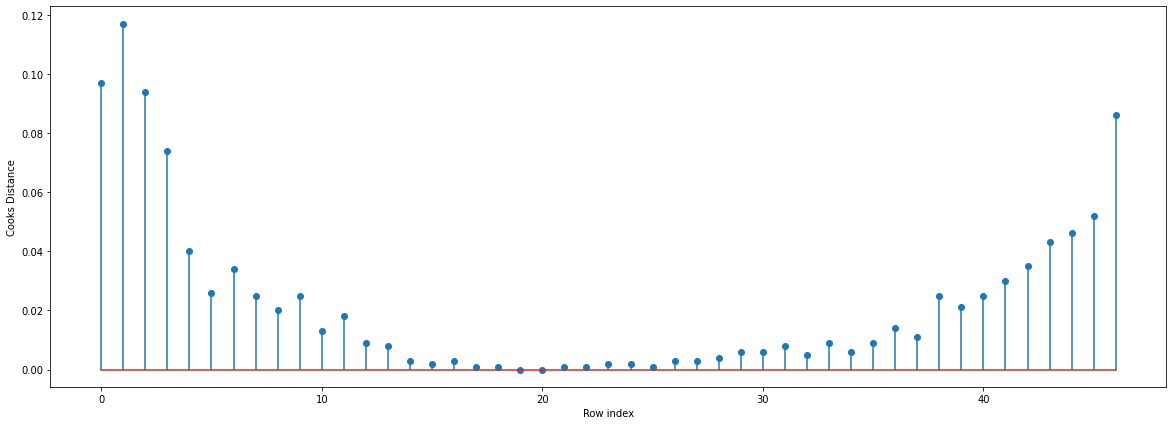

In [40]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [41]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(1, 0.11730428734289683)

In [42]:
#Drop 76 and 77 observations
df2=df1.drop(df1.index[[19]],axis=0)

In [43]:
df2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
#Reset the index and re arrange the row values
df3=df2.reset_index()

In [45]:
df4=df3.drop(['index'],axis=1)

In [46]:
df4

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [47]:
#Build the model on the new data
final_ml_V= smf.ols('Profit~Administration+State',data = df4).fit()

In [48]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

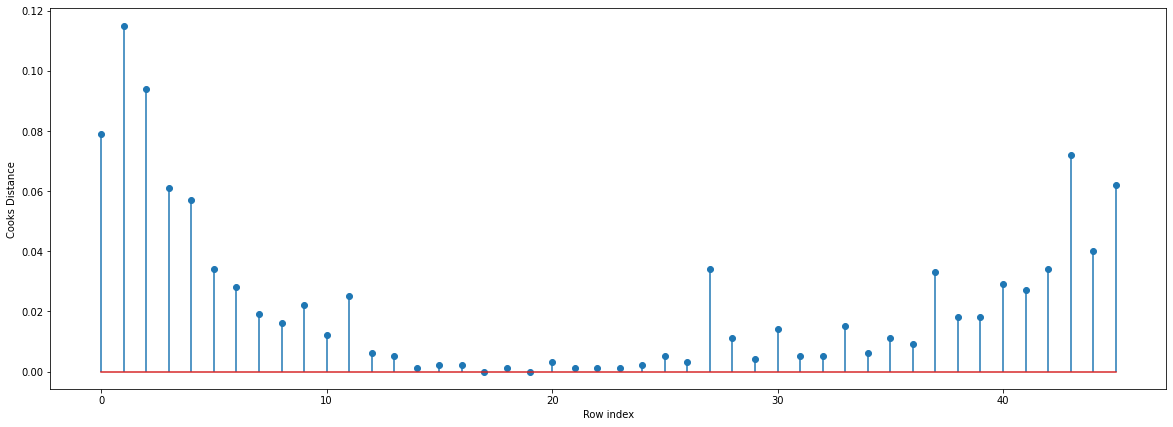

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [50]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(1, 0.11480555100132202)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [51]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Profit~Administration+State',data = df4).fit()

In [52]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.02128083329350583, 1101.6367898502901)

## Predicting for new data

In [56]:
#New data for prediction
new_data=pd.DataFrame({'Profit':39,"R&D":90,"Marketing":100,"Administration":30,"State":'Florida'},index=[1])

In [57]:
new_data

,Profit,R&D,Marketing,Administration,State
1,39,90,100,30,Florida


In [58]:
final_ml_V.predict(new_data)

1    97113.769904
dtype: float64